In [1]:
import numpy as np
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n = 1000  # Number of users in each group

# Group A
group_a = np.random.normal(loc=50, scale=10, size=n)  # Mean 50, Std Dev 10

# Group B
group_b = np.random.normal(loc=55, scale=10, size=n)  # Mean 55, Std Dev 10

# Create a DataFrame
data = pd.DataFrame({
    'Group': ['A'] * n + ['B'] * n,
    'Value': np.concatenate([group_a, group_b])
})

print(data.head())

  Group      Value
0     A  54.967142
1     A  48.617357
2     A  56.476885
3     A  65.230299
4     A  47.658466


In [2]:
from scipy import stats

# Split the data by group
group_a_values = data[data['Group'] == 'A']['Value']
group_b_values = data[data['Group'] == 'B']['Value']

# Perform a t-test
t_stat, p_value = stats.ttest_ind(group_a_values, group_b_values)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("The result is statistically significant. There is a significant difference between Group A and Group B.")
else:
    print("The result is not statistically significant. There is no significant difference between Group A and Group B.")

T-statistic: -12.477026028717438
P-value: 1.849216934841512e-34
The result is statistically significant. There is a significant difference between Group A and Group B.


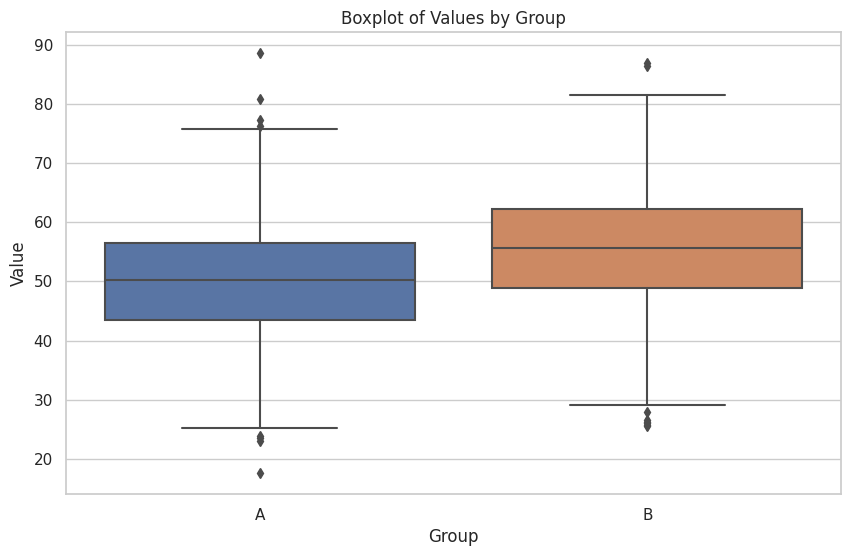

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

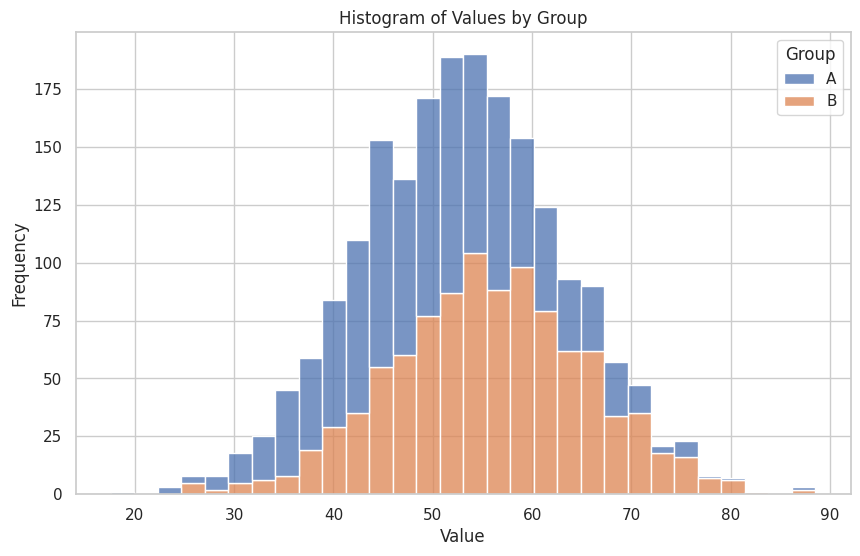

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Value', data=data)
plt.title('Boxplot of Values by Group')
plt.xlabel('Group')
plt.ylabel('Value')
plt.show()

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Value', hue='Group', multiple='stack', bins=30)
plt.title('Histogram of Values by Group')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()